In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import keras
from keras.utils import np_utils
from keras.models import Model
from keras.models import Sequential
from keras.layers import Conv1D, ZeroPadding1D, MaxPooling1D, BatchNormalization, Activation, Dropout, Flatten, Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv1D, Conv2D, MaxPooling2D,Dropout,MaxPooling1D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from matplotlib import pyplot as plt

In [3]:
dataset = pd.read_csv(r'C:\Users\Dataset\Surya.csv')

In [4]:
dataset_features_ch1 =  dataset[dataset['EMG'] == 'EMG1']

In [5]:
dataset_features_ch1.shape

(180, 1002)

In [6]:
dataset_labels = dataset_features_ch1['label']
dataset_features = dataset_features_ch1.drop(columns=['label','EMG'],axis=1)
dataset_features.shape

(180, 1000)

In [7]:
encoder = LabelEncoder()
encoder.fit(dataset_labels)
encoded_Y = encoder.transform(dataset_labels)
y = np_utils.to_categorical(encoded_Y)
y.shape

(180, 6)

In [8]:
x = np.array(dataset_features[:])
x = x.reshape(x.shape[0],x.shape[1],1)
x.shape

(180, 1000, 1)

In [9]:
x = np.asarray(x).astype(np.float32)

In [10]:
from tensorflow import keras

In [11]:
kfold = KFold(n_splits=3, shuffle=True)
model = Sequential()
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_train.shape[1],x_train.shape[2])))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x_r.shape[1],x_r.shape[2])))
#model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x.shape[0],x.shape[1])))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(x.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(y.shape[1], activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [12]:
print(x.shape, y.shape)

(180, 1000, 1) (180, 6)


In [13]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 998, 64)           256       
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 996, 64)           12352     
_________________________________________________________________
dropout (Dropout)            (None, 996, 64)           0         
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 498, 64)           0         
_________________________________________________________________
flatten (Flatten)            (None, 31872)             0         
_________________________________________________________________
dense (Dense)                (None, 100)               3187300   
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 6

In [14]:
Results = {'accuracy':[], 'loss':[], 'val_accuracy':[], 'val_loss':[]}

In [15]:
fold_no = 1
for train, test in kfold.split(x, y):
    print('------------------------------------------------------------------------')
    print(f"Training for fold {fold_no} ...")
    #history = model.fit(x_r[train], y_r[train], epochs=100, batch_size=100, validation_data= (x_r[test], y_r[test]) )
    #history = model.fit(train, epochs=100, batch_size=100, validation_data= test )
    history = model.fit(x[train], y[train], epochs=100, batch_size=100, verbose=1, validation_data= (x[test], y[test]))
    #scores = model.evaluate(x[test], y[test], verbose=0)

    # Increase fold number
    fold_no = fold_no + 1
    #Results = appendHist(Results, history)
    #Results_Acc = Results_Acc.append(history.history['accuracy'])
    Results['accuracy'].append(history.history['acc'])
    Results['loss'].append(history.history['loss'])
    Results['val_accuracy'].append(history.history['val_acc'])
    Results['val_loss'].append(history.history['val_loss'])

------------------------------------------------------------------------
Training for fold 1 ...
Train on 120 samples, validate on 60 samples
Epoch 1/100
120/120 [==============================] - 1s 8ms/sample - loss: 47.7969 - acc: 0.2083 - val_loss: 296.9334 - val_acc: 0.1667
Epoch 2/100
120/120 [==============================] - 1s 5ms/sample - loss: 295.5939 - acc: 0.2250 - val_loss: 323.3093 - val_acc: 0.2000
Epoch 3/100
120/120 [==============================] - 1s 5ms/sample - loss: 286.3780 - acc: 0.3000 - val_loss: 197.6731 - val_acc: 0.1667
Epoch 4/100
120/120 [==============================] - 1s 5ms/sample - loss: 153.1766 - acc: 0.2667 - val_loss: 54.3818 - val_acc: 0.3667
Epoch 5/100
120/120 [==============================] - 1s 4ms/sample - loss: 41.3991 - acc: 0.4750 - val_loss: 39.8454 - val_acc: 0.1667
Epoch 6/100
120/120 [==============================] - 1s 5ms/sample - loss: 29.1180 - acc: 0.3250 - val_loss: 22.5318 - val_acc: 0.2833
Epoch 7/100
120/120 [=========

Epoch 60/100
120/120 [==============================] - 1s 5ms/sample - loss: 5.2569e-04 - acc: 1.0000 - val_loss: 1.0095 - val_acc: 0.7833
Epoch 61/100
120/120 [==============================] - 1s 5ms/sample - loss: 4.0243e-04 - acc: 1.0000 - val_loss: 1.0068 - val_acc: 0.7833
Epoch 62/100
120/120 [==============================] - 1s 5ms/sample - loss: 4.2433e-04 - acc: 1.0000 - val_loss: 1.0060 - val_acc: 0.7833
Epoch 63/100
120/120 [==============================] - 1s 4ms/sample - loss: 6.1638e-04 - acc: 1.0000 - val_loss: 1.0066 - val_acc: 0.7833
Epoch 64/100
120/120 [==============================] - 1s 5ms/sample - loss: 2.9433e-04 - acc: 1.0000 - val_loss: 1.0029 - val_acc: 0.7833
Epoch 65/100
120/120 [==============================] - 1s 5ms/sample - loss: 5.6652e-04 - acc: 1.0000 - val_loss: 1.0054 - val_acc: 0.7833
Epoch 66/100
120/120 [==============================] - 1s 5ms/sample - loss: 4.9035e-04 - acc: 1.0000 - val_loss: 1.0259 - val_acc: 0.7833
Epoch 67/100
120/120

120/120 [==============================] - 1s 4ms/sample - loss: 0.0012 - acc: 1.0000 - val_loss: 0.1573 - val_acc: 0.9333
Epoch 19/100
120/120 [==============================] - 1s 5ms/sample - loss: 0.0030 - acc: 1.0000 - val_loss: 0.1344 - val_acc: 0.9500
Epoch 20/100
120/120 [==============================] - 1s 4ms/sample - loss: 0.0013 - acc: 1.0000 - val_loss: 0.1244 - val_acc: 0.9833
Epoch 21/100
120/120 [==============================] - 1s 4ms/sample - loss: 7.5434e-04 - acc: 1.0000 - val_loss: 0.1232 - val_acc: 0.9833
Epoch 22/100
120/120 [==============================] - 1s 4ms/sample - loss: 0.0015 - acc: 1.0000 - val_loss: 0.1239 - val_acc: 0.9833
Epoch 23/100
120/120 [==============================] - 1s 4ms/sample - loss: 5.9885e-04 - acc: 1.0000 - val_loss: 0.1250 - val_acc: 0.9833
Epoch 24/100
120/120 [==============================] - 1s 4ms/sample - loss: 5.9827e-04 - acc: 1.0000 - val_loss: 0.1260 - val_acc: 0.9833
Epoch 25/100
120/120 [===========================

Epoch 77/100
120/120 [==============================] - 1s 4ms/sample - loss: 9.1812e-05 - acc: 1.0000 - val_loss: 0.1462 - val_acc: 0.9667
Epoch 78/100
120/120 [==============================] - 1s 5ms/sample - loss: 8.1386e-05 - acc: 1.0000 - val_loss: 0.1465 - val_acc: 0.9667
Epoch 79/100
120/120 [==============================] - 1s 4ms/sample - loss: 8.3166e-05 - acc: 1.0000 - val_loss: 0.1467 - val_acc: 0.9667
Epoch 80/100
120/120 [==============================] - 1s 5ms/sample - loss: 1.0970e-04 - acc: 1.0000 - val_loss: 0.1469 - val_acc: 0.9667
Epoch 81/100
120/120 [==============================] - 1s 4ms/sample - loss: 5.5811e-05 - acc: 1.0000 - val_loss: 0.1471 - val_acc: 0.9667
Epoch 82/100
120/120 [==============================] - 1s 4ms/sample - loss: 6.6862e-05 - acc: 1.0000 - val_loss: 0.1473 - val_acc: 0.9667
Epoch 83/100
120/120 [==============================] - 1s 4ms/sample - loss: 7.7842e-05 - acc: 1.0000 - val_loss: 0.1474 - val_acc: 0.9667
Epoch 84/100
120/120

Epoch 91/100
120/120 [==============================] - 1s 4ms/sample - loss: 1.0280e-04 - acc: 1.0000 - val_loss: 1.7574e-04 - val_acc: 1.0000
Epoch 92/100
120/120 [==============================] - 1s 4ms/sample - loss: 8.9690e-05 - acc: 1.0000 - val_loss: 1.7390e-04 - val_acc: 1.0000
Epoch 93/100
120/120 [==============================] - 1s 4ms/sample - loss: 4.7719e-05 - acc: 1.0000 - val_loss: 1.7191e-04 - val_acc: 1.0000
Epoch 94/100
120/120 [==============================] - 1s 4ms/sample - loss: 5.3658e-05 - acc: 1.0000 - val_loss: 1.7034e-04 - val_acc: 1.0000
Epoch 95/100
120/120 [==============================] - 1s 4ms/sample - loss: 4.5733e-05 - acc: 1.0000 - val_loss: 1.6864e-04 - val_acc: 1.0000
Epoch 96/100
120/120 [==============================] - 1s 4ms/sample - loss: 5.0985e-05 - acc: 1.0000 - val_loss: 1.6639e-04 - val_acc: 1.0000
Epoch 97/100
120/120 [==============================] - 1s 4ms/sample - loss: 1.4427e-04 - acc: 1.0000 - val_loss: 1.6221e-04 - val_acc:

In [16]:
A = Results['accuracy']
B = Results['val_accuracy']
C = Results['loss']
D = Results['val_loss']

In [17]:
#Ac = np.array([A[0], A[1], A[2]])
TrainAcc = np.concatenate((A[0], A[1],A[2]), axis=0)
TestAcc = np.concatenate((B[0], B[1],B[2]), axis=0)
Trainloss = np.concatenate((C[0], C[1],C[2]), axis=0)
Testloss = np.concatenate((D[0], D[1],D[2]), axis=0)

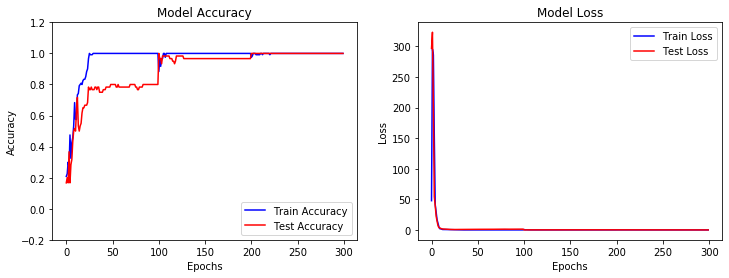

In [18]:
fig, (ax1, ax2) = plt.subplots(1, 2)
#fig.suptitle('Model Accuracy and Loss')
fig.set_figheight(4)
fig.set_figwidth(12)
ax1.plot(TrainAcc,'b')
ax1.plot(TestAcc,'r-')
ax1.set_ylim(-0.2, 1.2)
ax1.set_title('Model Accuracy')
ax1.set(xlabel='Epochs',ylabel='Accuracy')
ax1.legend(['Train Accuracy', 'Test Accuracy'], loc='lower right')
ax2.plot(Trainloss,'b')
ax2.plot(Testloss,'r-')
#ax2.set_ylim(-0.2, 1.2)
ax2.set_title('Model Loss')
ax2.set(xlabel='Epochs',ylabel='Loss')
#plt.ylabel('Accuracy')

ax2.legend(['Train Loss', 'Test Loss'], loc='upper right')

In [21]:
# Evaluate the model
loss, acc = model.evaluate(x, y, verbose=2)
print("Model Accuracy: {:5.2f}%".format(100 * acc))


180/180 - 0s - loss: 6.4397e-05 - acc: 1.0000
Model Accuracy: 100.00%


In [24]:
model.save('model1_30_5.h5')

In [26]:
import tensorflow as tf

In [36]:
direct = os.getcwd()
Model_Fname = direct+'\model1_30_5'
print(Model_Fname)

C:\Users\Karthikeyan\GUI_BionicHand\model1_30_5


In [40]:
# Convert the model

converter = tf.lite.TFLiteConverter.from_saved_model(direct) # path to the SavedModel directory
tflite_model = converter.convert()




OSError: SavedModel file does not exist at: C:\Users\Karthikeyan\GUI_BionicHand/{saved_model.pbtxt|saved_model.pb}

In [ ]:
# Save the model.
with open('model1_30_5.tflite', 'wb') as f:
  f.write(tflite_model)